In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
%matplotlib inline

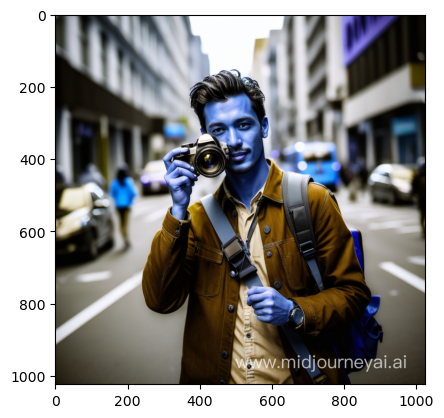

In [2]:
# load the image

img= cv2.imread(r"C:\Users\varsha\Pictures\CV_IMG\cam_man.png")
plt.imshow(img)

In [3]:
img.shape

(1024, 1024, 3)

In [4]:
# Resize the image
img= cv2.resize(img,(500,500))
img.shape

(500, 500, 3)

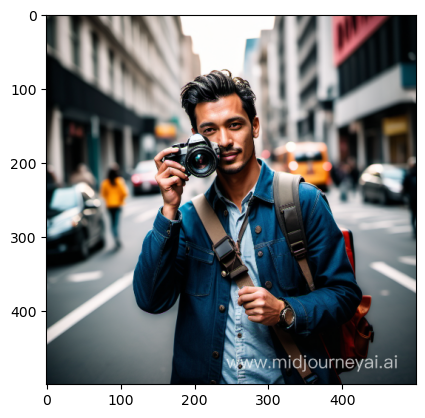

In [5]:
# convert BGR to RGB
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
# Convert to the gray scale image
gray_img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_img

array([[124, 113, 100, ...,   9,   9,   8],
       [117, 104,  91, ...,   9,   9,   8],
       [108,  96,  83, ...,   9,   9,   9],
       ...,
       [ 19,  20,  20, ...,  31,  29,  29],
       [ 18,  18,  21, ...,  29,  29,  28],
       [ 18,  19,  20, ...,  28,  27,  27]], dtype=uint8)

Text(0.5, 1.0, 'Gray Img')

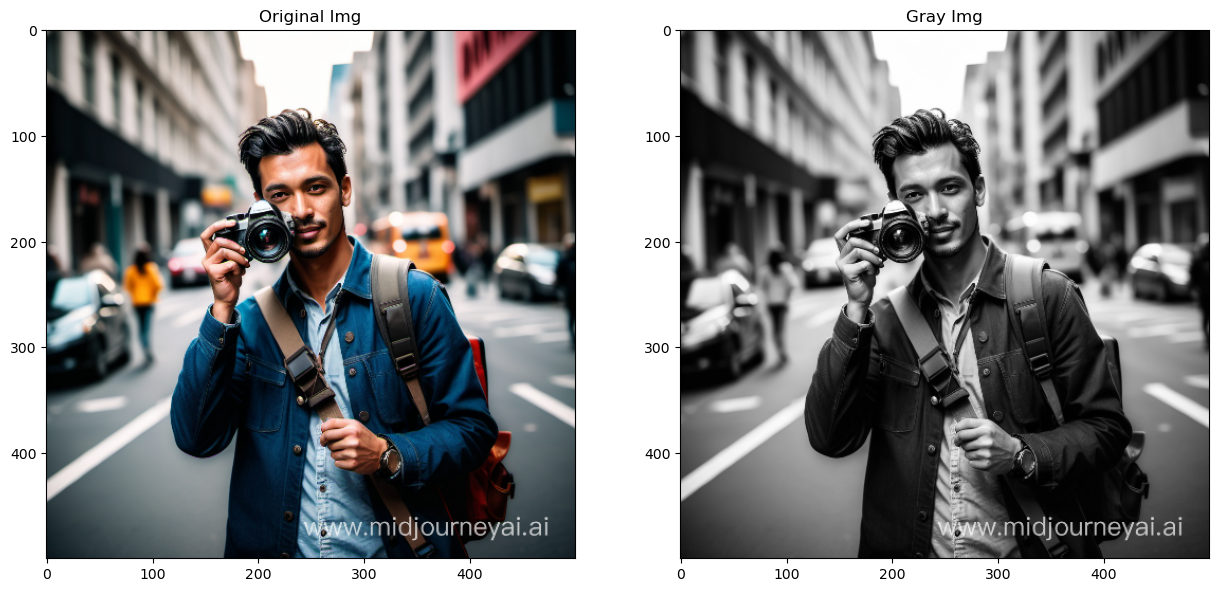

In [7]:
# Plot gray image
fig, ax= plt.subplots(1,2, figsize=(15,15))

ax[0].imshow(img)
ax[0].set_title('Original Img')

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('Gray Img')


In [8]:
# Inverted Gray Image
inv_gray_img= 255-gray_img
inv_gray_img

array([[131, 142, 155, ..., 246, 246, 247],
       [138, 151, 164, ..., 246, 246, 247],
       [147, 159, 172, ..., 246, 246, 246],
       ...,
       [236, 235, 235, ..., 224, 226, 226],
       [237, 237, 234, ..., 226, 226, 227],
       [237, 236, 235, ..., 227, 228, 228]], dtype=uint8)

Text(0.5, 1.0, 'Inv_Gray Img')

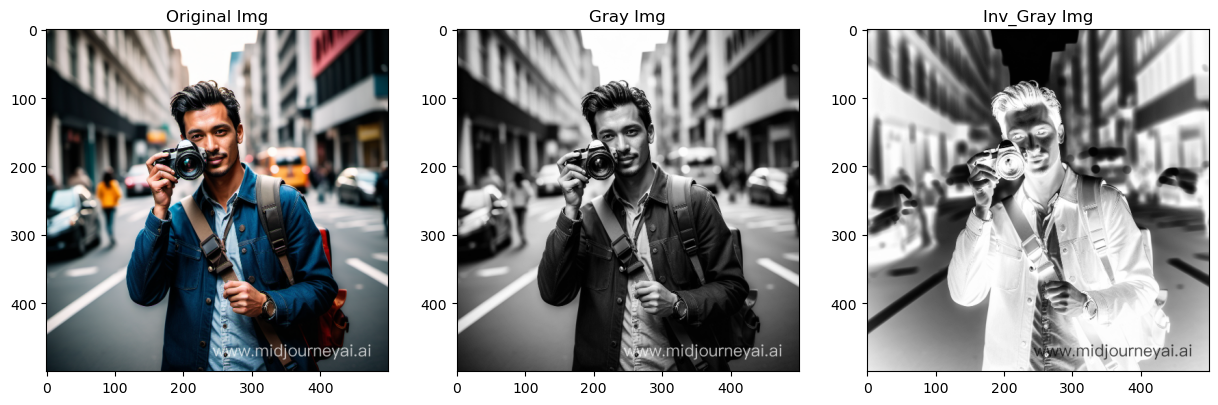

In [9]:
# Plot the images

fig, ax= plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(img)
ax[0].set_title('Original Img')

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('Gray Img')

ax[2].imshow(inv_gray_img, cmap='gray')
ax[2].set_title('Inv_Gray Img')

In [10]:
# Blur the inverted gray image
blur_img= cv2.GaussianBlur(inv_gray_img, (5,5), 2)
# blur_img= cv2.bilateralFilter(inv_gray_img, 5, 85, 85)
blur_img

array([[152, 156, 165, ..., 246, 246, 246],
       [154, 158, 167, ..., 246, 246, 246],
       [161, 165, 174, ..., 246, 246, 246],
       ...,
       [235, 235, 234, ..., 226, 226, 226],
       [236, 235, 235, ..., 226, 226, 226],
       [236, 236, 235, ..., 226, 226, 226]], dtype=uint8)

Text(0.5, 1.0, 'Blurred Img')

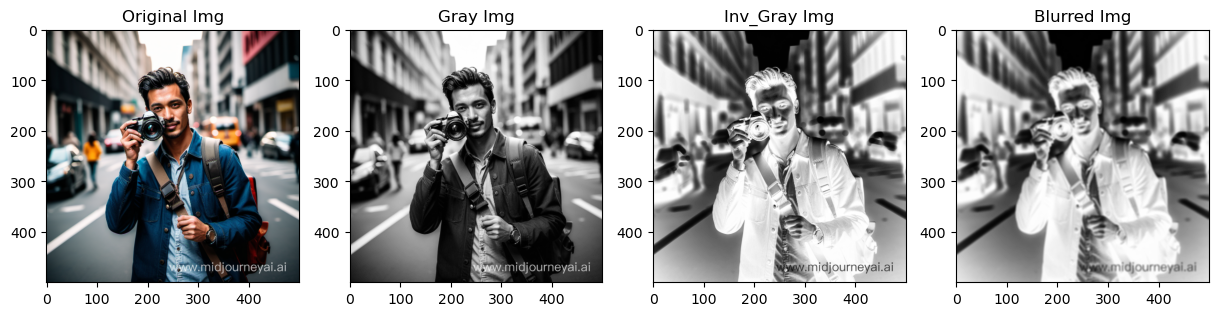

In [11]:
# Plot the images

fig, ax= plt.subplots(1,4, figsize=(15,15))
ax[0].imshow(img)
ax[0].set_title('Original Img')

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('Gray Img')

ax[2].imshow(inv_gray_img, cmap='gray')
ax[2].set_title('Inv_Gray Img')

ax[3].imshow(blur_img, cmap='gray')
ax[3].set_title('Blurred Img')

### Two ways to create sketch image:

1. by blending i.e adding blur img with the gray scale image, to get the effect by enhancing the edges.
2. by dividing the gray scale img with blur img, remains with the highlights the boldest edges. 

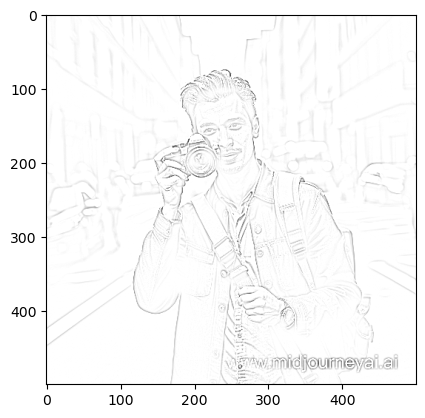

In [17]:
# Blend Inverted Gray Scale image with the gray scale image to create sketch like img

blended_img= cv2.addWeighted(blur_img, 1, gray_img, 1, 0)
plt.imshow(blended_img, cmap='gray')

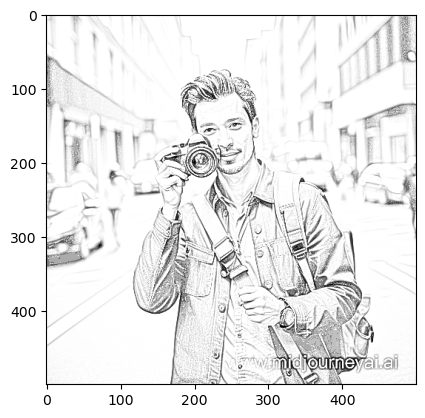

In [27]:
#dividing the gray scale img with inverted gray image, remains with the highlights the boldest edges.
bl_img= cv2.GaussianBlur(gray_img,(5,5), 2 )
im= cv2.divide(gray_img,bl_img-255,scale=256)
plt.imshow(im, cmap='gray')

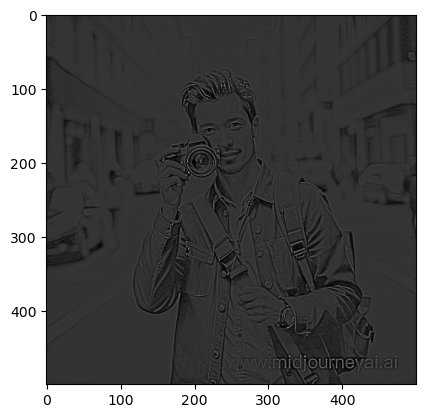

In [39]:
plt.imshow(np.divide(gray_img,(bl_img-255)), cmap='gray')

Text(0.5, 1.0, 'Blended Img by divide')

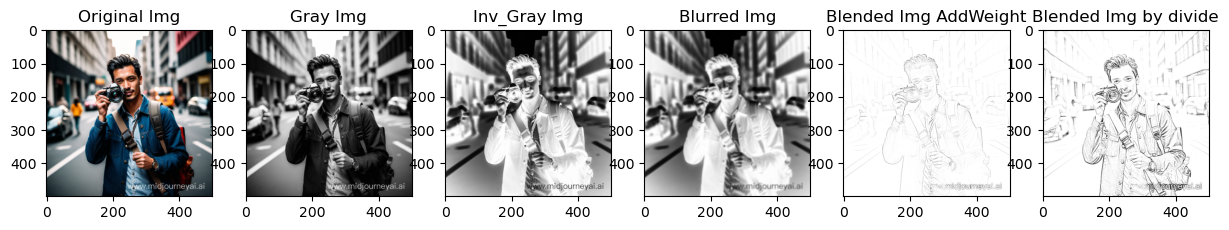

In [21]:
# Plot the images

fig, ax= plt.subplots(1,6, figsize=(15,15))
ax[0].imshow(img)
ax[0].set_title('Original Img')

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('Gray Img')

ax[2].imshow(inv_gray_img, cmap='gray')
ax[2].set_title('Inv_Gray Img')

ax[3].imshow(blur_img, cmap='gray')
ax[3].set_title('Blurred Img')

ax[4].imshow(blended_img, cmap= 'gray')
ax[4].set_title('Blended Img AddWeight')

ax[5].imshow(im, cmap= 'gray')
ax[5].set_title('Blended Img by divide')

## Tkinter

In [ ]:
# !pip install tk

In [ ]:
# !pip install pillow

In [ ]:
from tkinter import filedialog
import tkinter as tk

In [ ]:
def create_sketch(img_path):
    
    # read the image
    img= cv2.imread(img_path)
    
    # resize the img
    img= cv2.resize(img, (500, 500))
    
    # convert BGR to RGB img
    rgb_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # convert to gray scale
    gray_img= cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
    
    # convert to dark scale by inverting the gray scale img
    dark_img= 255- gray_img
    
    # blur the image
    blur_img= cv2.GaussianBlur(dark_img, (21,21), 2)
    
    # blend blur and gray img to get the sketch feel    
    sketch_img= cv2.divide(gray_img,255-blur_img,scale=256)
    
    # convert gray bck to bgr
    output= cv2.cvtColor(sketch_img, cv2.COLOR_GRAY2BGR)

#     plt.imshow(output, cmap='gray')
    
    # concate original and sketch img 
    return np.hstack((img, output))
    


In [ ]:
# function to create a dialog window to select image from the folder

def select_image():
    file_path= filedialog.askopenfilename()
    sketch= create_sketch(file_path)
    
    # show image in 2 different window
    cv2.imshow('original Img', sketch[:,:500])
    cv2.imshow('Sketch img', sketch[:,500:])
    
    # wait for a keyboard event and then close all OpenCV windows 
    cv2.waitKey(0)
    cv2.destroyAllWindows()  

In [ ]:
# Create a tkinter window and set pixel size to 600 x 500
root= tk.Tk()
root.title('Sketch Canvas')
root.geometry('600x500')

# code to create button to select image
select_button= tk.Button(root, text= 'Select Image', command= select_image)
select_button.pack()

# starts the main event loop of the Tkinter window, allowing the user to interact with the application by clicking on 
#buttons, entering text in entry widgets, etc.
root.mainloop()

In [ ]:
# https://projectgurukul.org/python-opencv-photo-sketching/
# https://www.analyticsvidhya.com/blog/2021/07/build-sketches-from-photographs-using-opencv/

## Function to display the images ----------Need to rework as its displaying one additional blank plot

cols=0
count= 0
img_info={}


def display_img( title, img):
    global count, cols
    cols+=1

    fig, axs= plt.subplots(1, cols, figsize=(10,10)) 
    img_info[count]= [img, title]

    for i in img_info:
        if (title=='Original_img') :
            
            axs[i].imshow(img_info[i][0])
            
        axs[i].imshow(img_info[i][0], cmap='gray')
        axs[i].set_title(img_info[i][1])
        
    count+=1 